**UE 4268 - Examen 2023**

**`Noms et prenoms`**, `matricule` et `email` 

Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

In [1]:
from IPython.display import Image

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

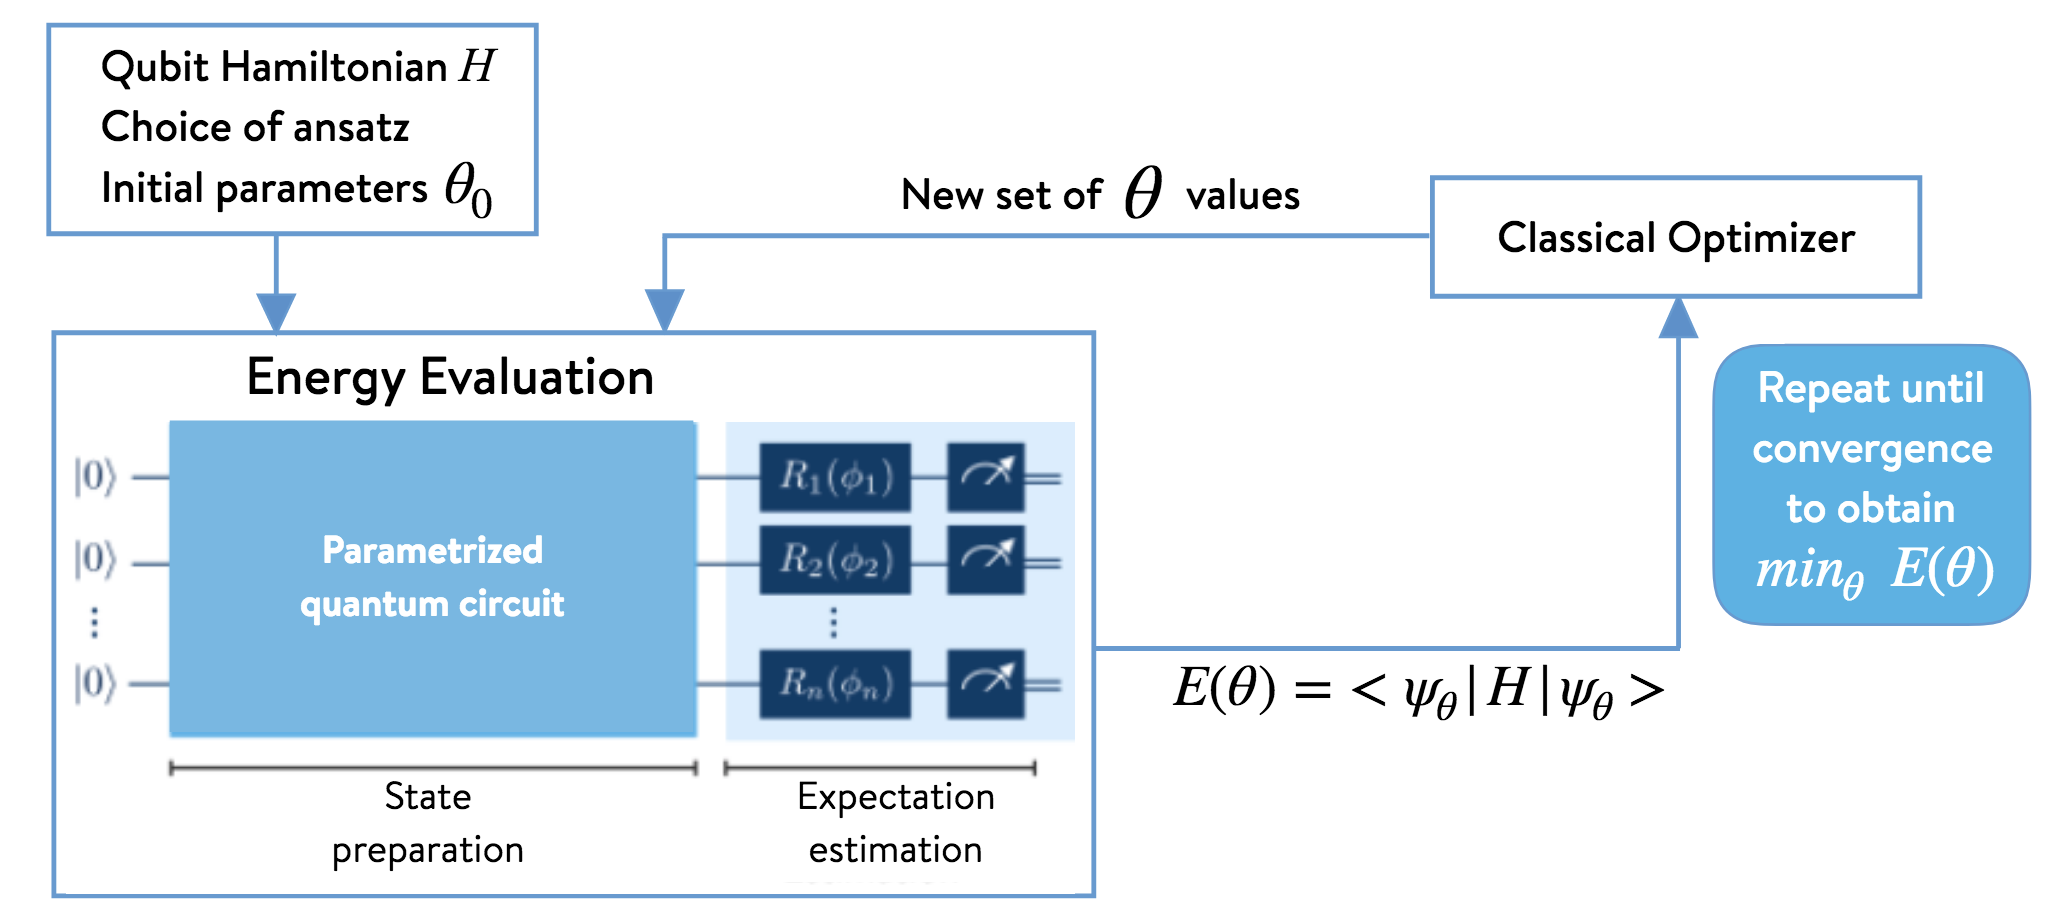

In [2]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [3]:
import sklearn
print(sklearn.__version__)

1.2.1


In [4]:
import rdkit
print(rdkit.__version__)

2022.09.5


In [8]:
# Put your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')
data_path

'/home/fredy/Downloads/session normale/./Dataset/Zn10.txt'

In [9]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split() for smi in content]
    
smile

[['NC(=O)C1CCCCC1C(F)(F)F'],
 ['CCCCCNC(=O)N1CCCC1CO'],
 ['CCC(CC)c1cc(C[NH3+])on1'],
 ['C[NH2+]C1CCC(c2ccccc2Cl)C1'],
 ['COc1ccc2c(c1)C(C(C)[NH3+])CN2C'],
 ['CC1C[NH2+]CCN1CCCc1ccco1'],
 ['Cc1ccc(S(=O)(=O)C2CC[NH2+]C2)cc1C'],
 ['COc1cc(C(N)C(F)(F)F)ccc1C(=O)[O-]'],
 ['Nc1cc(C2CCC[NH2+]2)ccc1O'],
 ['CN(C)S(=O)(=O)N1CC2CC1C(=O)O2'],
 ['CC(O)CC[NH2+]C(C)(C)C'],
 ['C=CC(C)OC(C)CC(=O)[O-]'],
 ['N#Cc1ccc2cc(C#N)ccc2c1'],
 ['Cc1ccc(O)c(C2(C)CCCO2)c1'],
 ['Cc1ccc(C)c2c1CC[NH2+]C2CC(O)C(=O)[O-]'],
 ['c1cc(C2NCCc3ccc4c(c32)OCO4)co1'],
 ['[NH3+]CCCn1c(CCO)nc2cccnc21'],
 ['CC([NH3+])C1CCCc2c1nc(C(F)(F)F)n2C'],
 ['CC(C)n1c(C2CCC[NH2+]C2)[nH+]c2c1CCCC2'],
 ['Cc1cc([O-])c2nnc(CC([NH3+])C(=O)[O-])n2n1'],
 ['C[NH+](C)CC(CC[NH3+])c1ccc(Cl)cc1'],
 ['CCc1ccc(-c2cnnc([O-])c2C#N)cc1'],
 ['Cc1cc(C(N)=[NH2+])c(C2CC2)o1'],
 ['CCCCN(C)c1nccc(C(=O)[O-])n1'],
 ['CC(C)(C[NH3+])C(=O)Nc1cccc(Cl)c1'],
 ['CC(=CC(=O)NCC1CC1)c1ccccc1'],
 ['CCNC(=O)N(CC)C(C)c1ccc(C#N)cc1'],
 ['CNC(=O)c1cc(O)c2ccc(OC)cc2c1'],
 ['CCC(CO)N

In [11]:
df = pd.DataFrame(data=smile, columns=['Smiles'])

,Smiles,Molecules
0,NC(=O)C1CCCCC1C(F)(F)F,
1,CCCCCNC(=O)N1CCCC1CO,
2,CCC(CC)c1cc(C[NH3+])on1,
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,
...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,
5997,CCCC[NH2+]C1CCc2ccccc21,
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,

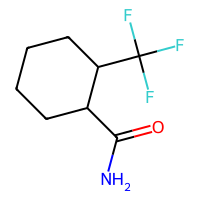
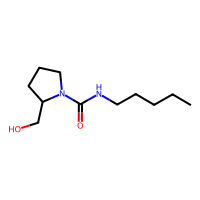
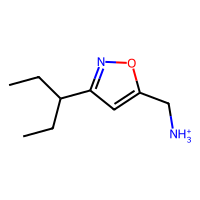
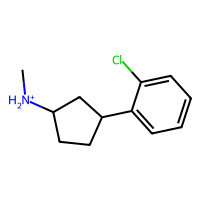
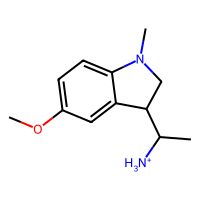
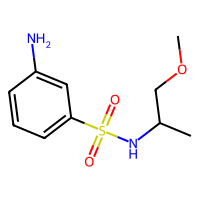
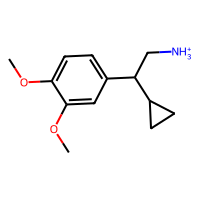
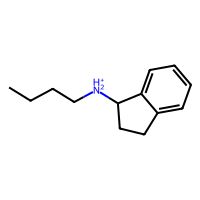
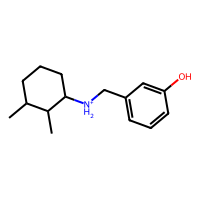
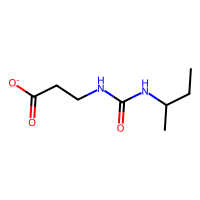

In [12]:
PandasTools.AddMoleculeColumnToFrame(frame = df, smilesCol='Smiles', molCol='Molecules')
df

In [13]:
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [14]:
def calculate_descriptors(mol):
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    psa = Descriptors.TPSA(mol)
    rb = Descriptors.NumRotatableBonds(mol)
    rg = Descriptors.NumAromaticRings(mol)
    qed = Chem.QED.qed(mol)
    return [mw, logp, hbd, hba, psa, rg, rb, qed]

In [17]:
molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

In [23]:
descriptors_df = pd.DataFrame(descriptors, columns=['MW', 'LogP', 'HBD', 'HBA', 'PSA', 'Aromatic Rings', 'Rotatable Bonds', 'QED'])
data = pd.concat([df, descriptors_df], axis=1)
data

,Smiles,Molecules,MW,LogP,HBD,HBA,PSA,Aromatic Rings,Rotatable Bonds,QED
0,NC(=O)C1CCCCC1C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7f8786ec3990>,195.184,1.8404,1,1,43.09,0,1,0.681153
1,CCCCCNC(=O)N1CCCC1CO,<rdkit.Chem.rdchem.Mol object at 0x7f8786ec3ed0>,214.309,1.3429,2,2,52.57,0,5,0.678579
2,CCC(CC)c1cc(C[NH3+])on1,<rdkit.Chem.rdchem.Mol object at 0x7f8786ec2b90>,169.248,1.3201,1,2,53.67,1,4,0.738657
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,<rdkit.Chem.rdchem.Mol object at 0x7f8786ec2ea0>,210.728,2.1693,1,0,16.61,1,2,0.770859
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,<rdkit.Chem.rdchem.Mol object at 0x7f8786cc9460>,207.297,0.8590,1,2,40.11,1,2,0.781030
...,...,...,...,...,...,...,...,...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,<rdkit.Chem.rdchem.Mol object at 0x7f87869b61f0>,244.316,0.5820,2,4,81.42,1,5,0.742397
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,<rdkit.Chem.rdchem.Mol object at 0x7f87869b6260>,222.308,1.4393,1,2,46.10,1,5,0.819062
5997,CCCC[NH2+]C1CCc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7f87869b62d0>,190.310,2.0374,1,0,16.61,1,4,0.699701
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,<rdkit.Chem.rdchem.Mol object at 0x7f87869b6340>,234.363,2.2803,2,1,36.84,1,3,0.826891


In [24]:
fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)

In [25]:
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [26]:
psa = data.iloc[:,6].values

In [27]:
psa.shape[0] == fps.shape[0]

True

In [28]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, psa, train_size=0.75, random_state=seed)

In [29]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

psa_predict = svr.predict(X_test)
r2 = r2_score(y_test, psa_predict)
mse = mean_squared_error(y_test, psa_predict)

print(f'The r2_score is {r2},and the mean square error is {mse}')

The r2_score is 0.6365100969177426,and the mean square error is 163.36706576765906


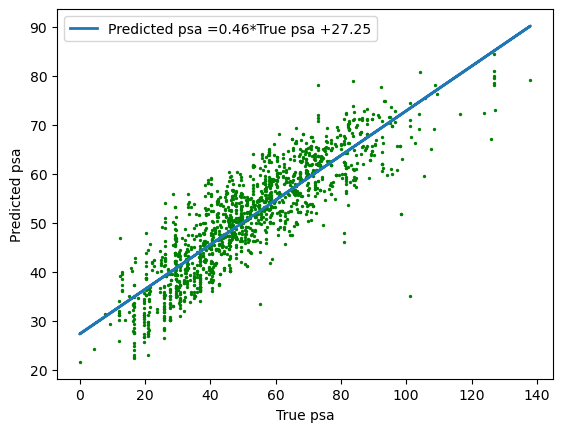

In [31]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, psa_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, psa_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted psa ='+str(round(vect_norm,2))+'*True psa +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True psa')
plt.ylabel('Predicted psa')
plt.legend()
plt.show()

### Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

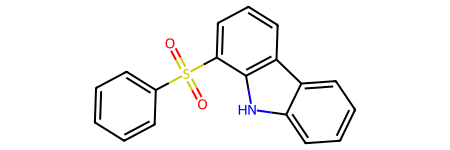

In [35]:
# Put your code here
smi = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(smi)
m

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [44]:
# Put your code here
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms import NumPyMinimumEigensolver

In [60]:
H = (-0.518418*I^I) + (-0.136555*(Z^I)) + (-0.13655*(I^Z)) + (-0.025866*(Z^Z)) + (-0.0015725*(X^X)) + (-0.0000296*(X^I)) + (-0.0000296*(I^X)) + (-0.0000296*(X^Z)) + (0.0000296*(Z^X))
print(H)


-0.518418 * II
- 0.136555 * ZI
- 0.13655 * IZ
- 0.025866 * ZZ
- 0.0015725 * XX
- 2.96e-05 * XI
- 2.96e-05 * IX
- 2.96e-05 * XZ
+ 2.96e-05 * ZX


In [62]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

The exact ground state energy is: -0.8173935379298557


# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

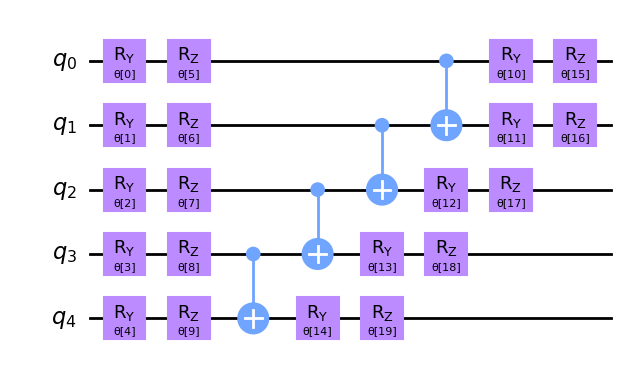

In [106]:
from qiskit.circuit.library import EfficientSU2
SU2ansatz = EfficientSU2
SU2ansatz = EfficientSU2(5, reps=1)
SU2ansatz.decompose().draw('mpl')

### Image(filename='./SU2_Ansatz.png', width=400)

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [91]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [92]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [93]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP



In [96]:
res_vqe = algorithm(H2_problem, mapper="JWM", optimizer="SLSQP")

TypeError: expected a sequence of integers or a single integer, got '<property object at 0x7f8787791120>'